# Data exploration
 En este archivo se realiza toda la exploración y análisis de las bases de datos seleccionadas para el proyecto.

Importación de librerías

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data exploration process

#### Cargue de los datasets

In [19]:
from data_quality import cargue_datasets
casos, edu_vial2018, encuesta_calidad, encuesta_cultura, hurto_tp, lesion_nf, mede_victimas, traffic, compar = cargue_datasets()

c:\Users\asus\OneDrive - Universidad de la Sabana\Trabajos Universidad\Semestre 8\Proyecto en analítica aplicada\Proyecto_analitica_aplicada\data_quality.py:21: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,11,12,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  mede_victimas=pd.read_csv(mede_victimas_ruta, delimiter=";", encoding="utf-8")
c:\Users\asus\OneDrive - Universidad de la Sabana\Trabajos Universidad\Semestre 8\Proyecto en analítica aplicada\Proyecto_analitica_aplicada\data_quality.py:23: DtypeWarning: Columns (8,12) have mixed types. Specify dtype option on import or set low_memory=False.
  compar=pd.read_csv(compar_ruta, delimiter=";", encoding="utf-8")


### Análisis de casos de delitos

In [20]:
# Tratamiento del dataset
from data_quality import casos_treatment
casos=casos_treatment(casos)

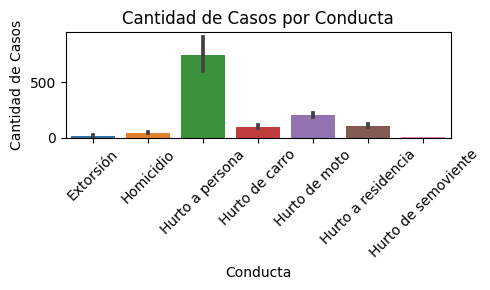

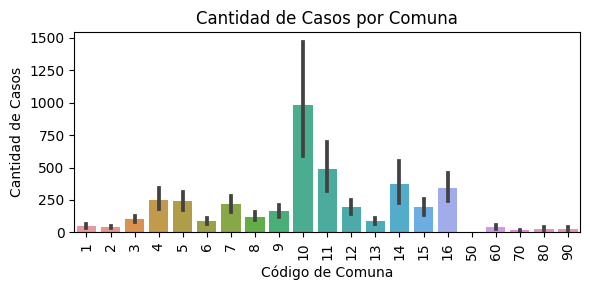

In [21]:
# Gráfico de barras: Cantidad de casos por conducta
plt.figure(figsize=(5, 3))
sns.barplot(x='Conducta', y='Cantidad_casos', data=casos)
plt.title('Cantidad de Casos por Conducta')
plt.xticks(rotation=45)
plt.xlabel('Conducta')
plt.ylabel('Cantidad de Casos')
plt.tight_layout()
plt.show()

# Gráfico de barras: Cantidad de casos por comuna
plt.figure(figsize=(6, 3))
sns.barplot(x='Codigo_comuna', y='Cantidad_casos', data=casos)
plt.title('Cantidad de Casos por Comuna')
plt.xlabel('Código de Comuna')
plt.ylabel('Cantidad de Casos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Análsis de eduación vial 2018

In [22]:
edu_vial2018 = edu_vial2018.drop(edu_vial2018.columns[[0,2,3,5,7,8,10,11,31,32,33,34,35]], axis=1)
edu_vial2018.rename(columns={'FECHA': 'Fecha', 'ACCIONES': 'Acciones', 'PUBLICO OBJETIVO': 'Publico', 'COD_COMUNA': 'Comuna'}, inplace=True)
edu_vial2018.rename(columns={'TOTAL PERSONAS SENSIBILIZADAS': 'N_personas', 'TOTAL MUJER': 'N_mujeres', 'TOTAL HOMBRE': 'N_hombres'}, inplace=True)
edu_vial2018['Fecha'] = pd.to_datetime(edu_vial2018['Fecha'])
edu_vial2018['Fecha'] = edu_vial2018['Fecha'].dt.strftime('%d/%m/%Y')

In [23]:
edu_vial2018

,Fecha,Acciones,Publico,COD_COMUNA,TOTAL PERSONAS SENSIBILIZADAS,TOTAL MUJER,TOTAL HOMBRE,MUJER NIÑO (6 a 13 años),MUJER JOVEN (14 a 28 años),MUJER ADULTO (29 a 59 años),...,MUJER CONDUCTOR,MUJER ACOMPAÑANTE Y/O PASAJERO,HOMBRE_JOVEN_(14_A_28_ANOS),HOMBRE ADULTO (29 A 59 ANOS),HOMBRE_PERSONA_MAYOR_(60_ANOS_Y_MÁS),HOMBRE_PEATON,HOMBRE_CICLISTA,HOMBRE_MOTOCICLISTA,HOMBRE_CONDUCTOR,HOMBRE_ACOMPANANTE_ Y/O_ PASAJERO
0,28/11/2019,Punto_Seguro_Peatones,Peatones,10,155,103,52,0,11,78.0,...,0,0,0.0,8,37.0,7.0,44,0.0,0.0,8
1,28/11/2019,Taller_Formativo_Empresas_de_Transporte_Public...,Conductores,14,131,22,109,1,5,13.0,...,0,1,0.0,2,105.0,0.0,6,0.0,0.0,103
2,28/11/2019,Otros_Instituciones_Educativas,Peatones,12,74,51,23,7,14,28.0,...,0,0,0.0,8,5.0,6.0,23,0.0,0.0,0
3,28/11/2019,Punto_Seguro_Vehiculos,Motociclistas,4,140,31,109,0,0,31.0,...,15,0,16.0,25,80.0,4.0,0,0.0,104.0,0
4,29/11/2019,Otros_Incidencia_y_Gestion,Peatones,5,65,47,18,0,0,0.0,...,0,0,0.0,0,0.0,18.0,18,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,12/04/2019,Punto_Seguro_Vehiculos,Motociclistas,10,265,70,195,0,21,49.0,...,47,2,20.0,55,140.0,0.0,0,0.0,172.0,12
2124,13/04/2019,Otros_Contacto_Ciudadano,Peatones,15,180,125,55,100,15,8.0,...,0,0,0.0,0,3.0,2.0,55,0.0,0.0,0
2125,22/04/2019,Socializacion_Proyectos_Movilidad_Conglomerado...,Personal Administrativo ó Gerencial,10,1,1,0,0,0,1.0,...,0,0,1.0,0,0.0,0.0,0,0.0,0.0,0
2126,23/04/2019,Dia_Sin_Carro,Ciclistas,4,309,83,226,3,52,28.0,...,0,0,0.0,133,93.0,0.0,0,226.0,0.0,0


### Victimas de Incidentes Viales en Medellín

In [24]:
mede_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048317 entries, 0 to 1048316
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Gravedad_victima     235843 non-null  object 
 1   Fecha_incidente      235843 non-null  object 
 2   Hora_incidente       235843 non-null  object 
 3   Clase_incidente      235843 non-null  object 
 4   Direccion_incidente  235831 non-null  object 
 5   Sexo                 235843 non-null  object 
 6   Edad                 235335 non-null  object 
 7   Condicion            235843 non-null  object 
 8   Mes                  235843 non-null  object 
 9   Dia                  235843 non-null  object 
 10  Num_dia              235843 non-null  float64
 11  Hora                 235843 non-null  object 
 12  Grupo_edad           235843 non-null  object 
 13  Año                  235843 non-null  float64
 14  Radicado             235838 non-null  object 
 15  Latitud        

Gravedad_victima
Heridos    233894
Muertos      1949
Name: count, dtype: int64


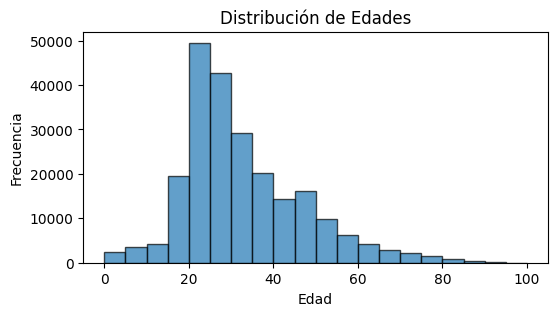

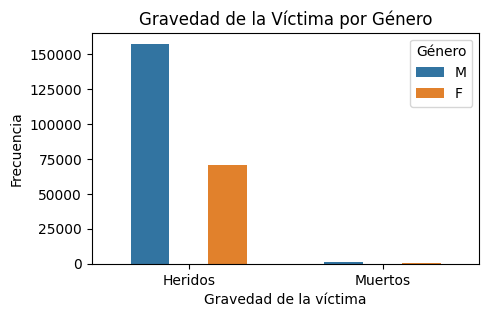

In [25]:
print(mede_victimas['Gravedad_victima'].value_counts())
mede_victimas = mede_victimas.dropna()
columns_to_check = ['Sexo', 'Edad']
for column in columns_to_check:
    mede_victimas = mede_victimas[(mede_victimas[column] != 'Sin Inf') & (mede_victimas[column] != 'Sin inf')]
import re
def convert_age_to_int(age_str):
    
    if isinstance(age_str, str) and '-' in age_str:
        ages = re.findall(r'\d+', age_str)  # Extraer los números del rango
        return (int(ages[0]) + int(ages[1])) // 2  # Promedio de los valores del rango
    else:
        return int(age_str)  # Si es un valor único, simplemente conviértelo a entero
# Eliminar filas con valores NaN en la columna 'Edad'
mede_victimas['Edad'] = mede_victimas['Edad'].apply(convert_age_to_int)
mede_victimas = mede_victimas.drop(mede_victimas[mede_victimas['Edad'] > 100].index)
# Distribución de edades
plt.figure(figsize=(6, 3))
plt.hist(mede_victimas['Edad'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades')
plt.show()

# Relación entre gravedad de la víctima y género
plt.figure(figsize=(5, 3))
plot = sns.countplot(x='Gravedad_victima', hue='Sexo', data=mede_victimas)
plt.xlabel('Gravedad de la víctima')
plt.ylabel('Frecuencia')

# Ajustar ancho de las barras
total_bars = len(plot.patches)
width = 0.1 if len(mede_victimas['Gravedad_victima'].unique()) > 2 else 0.2  # Ajustar el ancho si hay más de 2 categorías

for bar in plot.patches:
    current_width = bar.get_width()
    diff = current_width - width
    bar.set_width(width)
    bar.set_x(bar.get_x() + diff * 0.5)

# Ajustar límite inferior del eje y
plt.ylim(0, plt.ylim()[1])
plt.title('Gravedad de la Víctima por Género')
plt.legend(title='Género')
plt.show()

In [26]:
mede_victimas['Año'].unique()

array([2014., 2015., 2016., 2017., 2018., 2019., 2020., 2021.])

In [27]:
mede_victimas['Condicion'] = mede_victimas['Condicion'].replace({'Acompañante de Motocicleta': 'Acompañante de motocicleta'})
mede_victimas['Condicion'].unique()

array(['Motociclista', 'Peatón', 'Acompañante de motocicleta',
       'Conductor', 'Ciclista', 'Pasajero'], dtype=object)

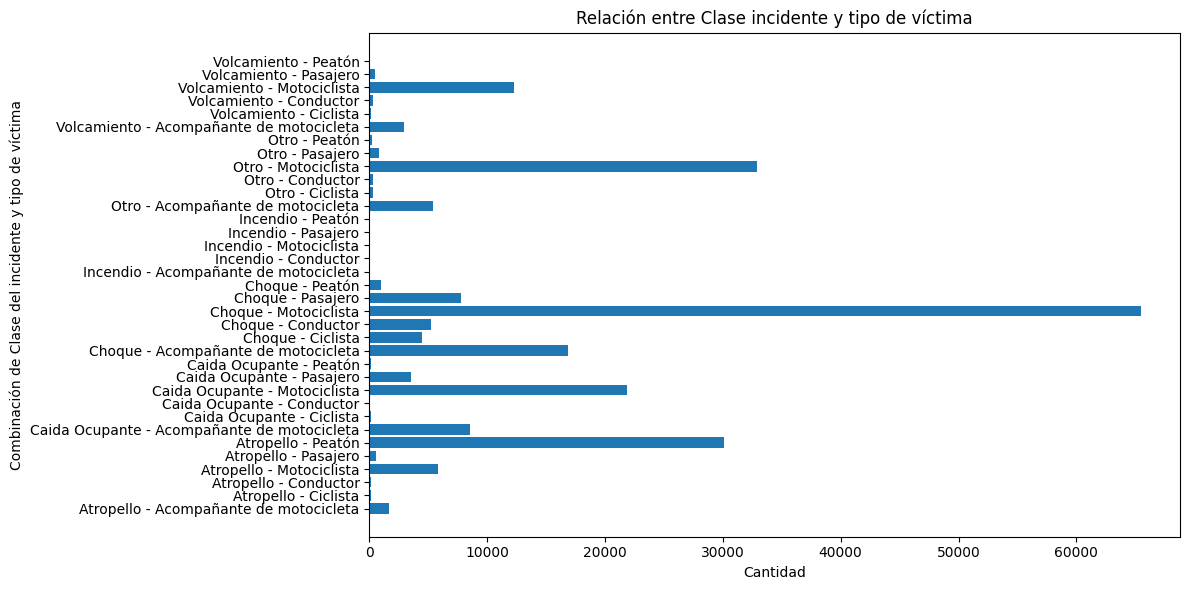

In [28]:
incident_condition_counts = mede_victimas.groupby(['Clase_incidente', 'Condicion']).size().reset_index(name='Cantidad')

# Crear un gráfico de barras horizontal
plt.figure(figsize=(12, 6))
plt.barh(incident_condition_counts['Clase_incidente'] + ' - ' + incident_condition_counts['Condicion'], incident_condition_counts['Cantidad'])
plt.xlabel('Cantidad')
plt.ylabel('Combinación de Clase del incidente y tipo de víctima')
plt.title('Relación entre Clase incidente y tipo de víctima')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

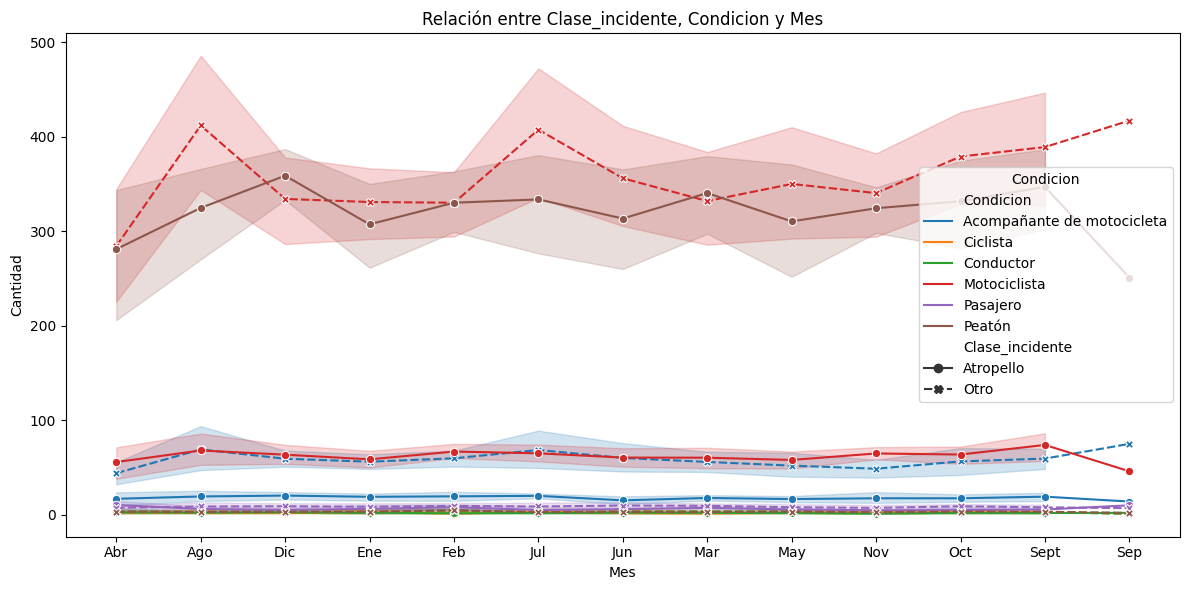

In [29]:
incident_condition_time_counts = mede_victimas.groupby(['Año', 'Mes', 'Clase_incidente', 'Condicion']).size().reset_index(name='Cantidad')

# Filtrar las clases de incidentes que deseas visualizar (opcional)
classes_to_plot = ['Atropello', 'Otro']  # Puedes personalizar esta lista
filtered_data = incident_condition_time_counts[incident_condition_time_counts['Clase_incidente'].isin(classes_to_plot)]

# Crear un gráfico de línea múltiple utilizando Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x='Mes', y='Cantidad', hue='Condicion', style='Clase_incidente', markers=True)
plt.title('Relación entre Clase_incidente, Condicion y Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.legend(title='Condicion')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

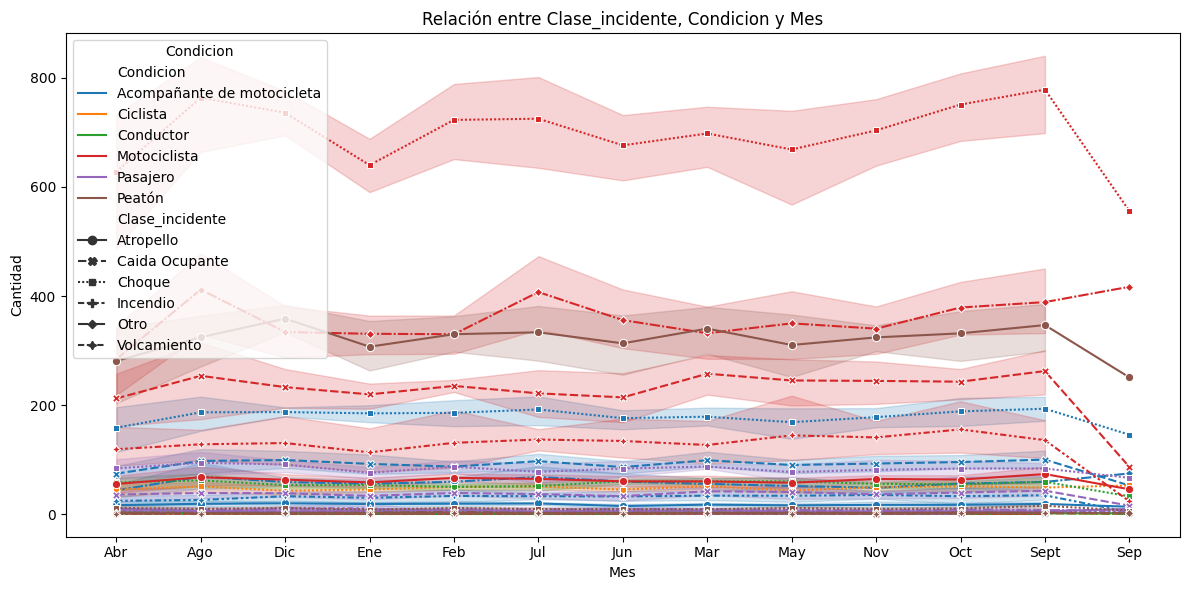

In [30]:
incident_condition_time_counts = mede_victimas.groupby(['Año', 'Mes', 'Clase_incidente', 'Condicion']).size().reset_index(name='Cantidad')

# Crear un gráfico de línea múltiple utilizando Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=incident_condition_time_counts, x='Mes', y='Cantidad', hue='Condicion', style='Clase_incidente', markers=True)
plt.title('Relación entre Clase_incidente, Condicion y Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.legend(title='Condicion')

# Mostrar el gráfico
plt.tight_layout()
plt.show()